In [2]:
import math, time, random, datetime
%matplotlib inline
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Preprocessing
from sklearn.preprocessing import (OneHotEncoder, 
LabelEncoder, label_binarize)

#Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import (model_selection, tree, preprocessing,
metrics, linear_model)
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import (LinearRegression, 
LogisticRegression, SGDClassifier)
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

#rebels and ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Import train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') #e.g of what a submisision should look like

In [15]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


0    549
1    342
Name: Survived, dtype: int64


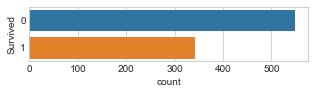

In [16]:
#get the info of the number of people survived
fig = plt.figure(figsize = (5,1))
sns.countplot(y ='Survived', data = train)
print(train.Survived.value_counts())

In [17]:
#adding  this to subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [18]:
df_bin.head()
print(len(df_bin))

891


In [19]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


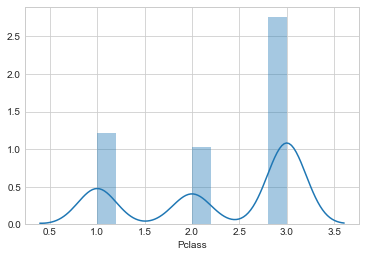

In [20]:
#to get the idea of the data distribution according to the passenger  class
sns.distplot(train.Pclass)

In [21]:
#give the number of missing variables in Pclass
train.Pclass.isnull().sum()

0

In [22]:
#since there  is no missing  values adding Pclass in the sub-dataframes
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [23]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [24]:
#Gives the total  number of different names in the data
train.Name.value_counts()

Van Impe, Mr. Jean Baptiste                          1
Gustafsson, Mr. Alfred Ossian                        1
Vande Velde, Mr. Johannes Joseph                     1
Chaffee, Mr. Herbert Fuller                          1
Ali, Mr. Ahmed                                       1
                                                    ..
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
LeRoy, Miss. Bertha                                  1
Levy, Mr. Rene Jacques                               1
Connors, Mr. Patrick                                 1
Rouse, Mr. Richard Henry                             1
Name: Name, Length: 891, dtype: int64

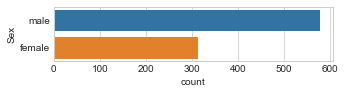

In [25]:
#gives the visualization of Sex distribution
plt.figure(figsize = (5,1))
sns.countplot(y = 'Sex', data = train)


In [26]:
#Checking the  missing value in the sex column
train.Sex.isnull().sum()

0

In [27]:
#adding to the sub-dataframe
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1,0)
df_con['Sex'] = train['Sex']

In [28]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

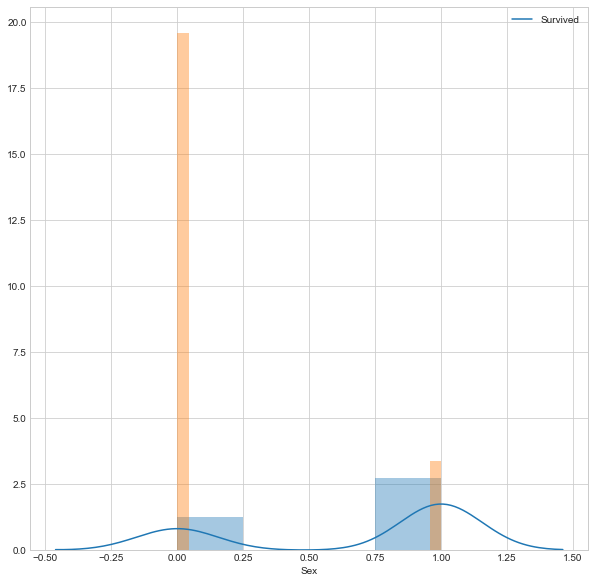

In [29]:
#givees the visualization of the Sex variable compared to Survivla
fig = plt.figure(figsize = (10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws = {'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws = {'label':'Did not survived'})

In [30]:
#missing data in Age
train.Age.isnull().sum()

177

Function to create count and distribution visualizations

In [31]:
def plotCountDist(data,bin_df, label_column, target_column, 
                  figsize, use_bin_df = False):
    """
    Function to plot counts and distributions of a 
    label variable and target variable side by side.
    data = target dataframe
    bin_df = binned dataframe for countplot
    label_column = binary labelled column
    target_column = column we want to view counts and distributions
    use_bin_df = whether or not to use the bin_df, default False
    """
    if use_bin_df:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = bin_df);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {"label":"survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                    kde_kws = {"label":"Did not survived"})
        
    else:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column, data = data);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws = {"label":"survived"})
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                    kde_kws = {"label":"Did not survived"})


In [32]:
train.SibSp.isnull().sum()

0

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

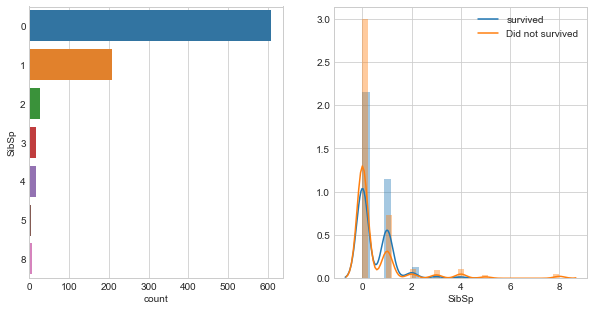

In [35]:
#Visualise the counts of sibling and spouse and the distribution of the values
#against survived
plotCountDist(train, 
              bin_df = df_bin,
              label_column = 'Survived',
              target_column = 'SibSp',
              figsize = (10,5))

In [36]:
train.Parch.isnull().sum()

0

In [37]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
#add parch to the sub-dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

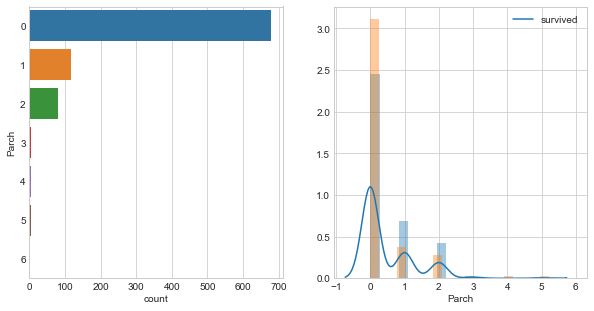

In [39]:
#visualise the counts of Parch and the distribution of the values against survived
plotCountDist(train,
             bin_df = df_bin,
             label_column = 'Survived',
             target_column = 'Parch',
             figsize = (10,5))

In [40]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [41]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [42]:
train.Ticket.isnull().sum()

0

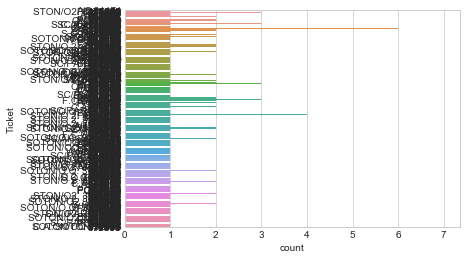

In [43]:
#how many types of tickets were there?
sns.countplot(y = 'Ticket', data = train)


In [44]:
train.Ticket.value_counts()

347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
362316              1
13567               1
STON/O2. 3101271    1
223596              1
234686              1
Name: Ticket, Length: 681, dtype: int64

In [45]:
#number of unique tickets
print("There are {} unique Tickets values.".format
      (len(train.Ticket.unique())))

There are 681 unique Tickets values.


In [46]:
train.Fare.isnull().sum()

0

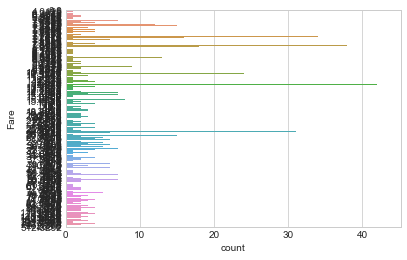

In [47]:
sns.countplot(y='Fare', data = train)

In [48]:
train.Fare.dtype

dtype('float64')

In [49]:
len(train.Fare.unique())

248

In [50]:
#add Fare to the sub-dataframe
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins = 5)

In [51]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [52]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [53]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


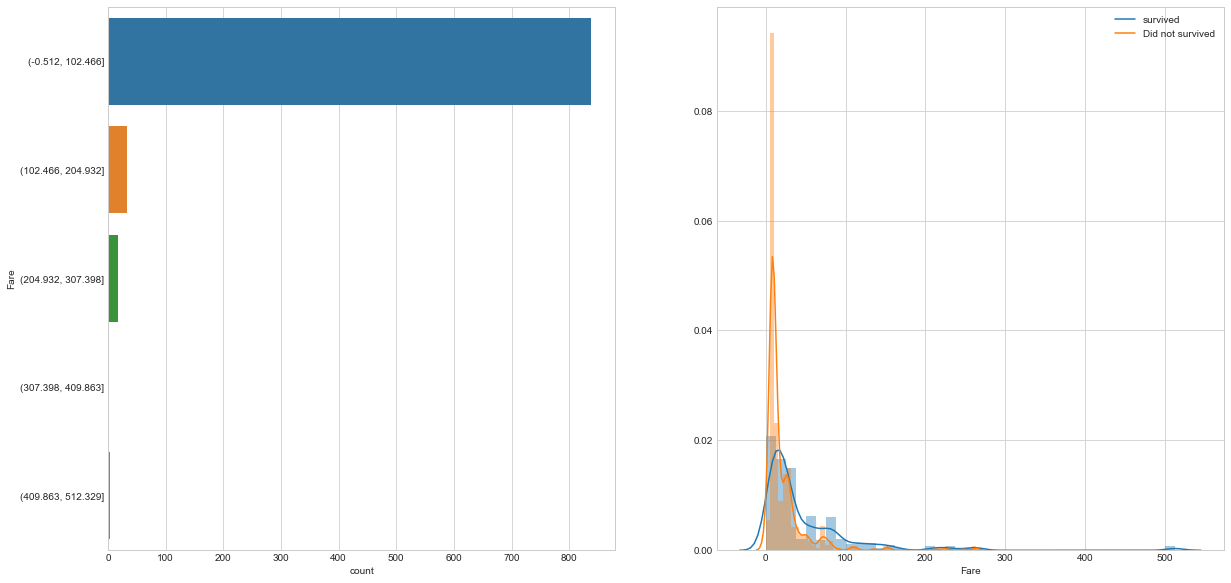

In [54]:
plotCountDist(data = train,
             bin_df = df_bin,
             label_column= 'Survived',
             target_column= 'Fare',
             figsize= (20,10),
             use_bin_df = True)

In [55]:
train.Cabin.isnull().sum()

687

In [56]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
              ..
E31            1
D45            1
B80            1
C111           1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [57]:
train.Embarked.isnull().sum()

2

In [58]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

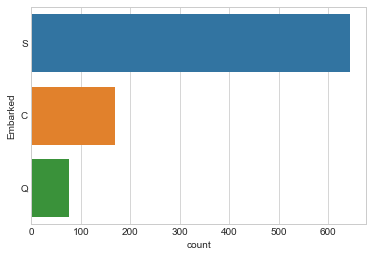

In [59]:
sns.countplot(y = 'Embarked', data = train)

In [60]:
#add Embarked to subdataframe
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [61]:
#Drop missing rows from the data
print(len(df_con))
df_con = df_con.dropna(subset = ['Embarked'])
df_bin =df_bin.dropna(subset = ['Embarked'])
print(len(df_con))

891
889


In [62]:
#to drop a column from the dataframe in pandas
#df_bin.drop(['Name'], axis = 1)


In [63]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [64]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [65]:
#One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [66]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [67]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [68]:
#one hot enconde the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix = 'embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix = 'sex')
df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], prefix = 'pclass')

In [69]:
#combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con,
                       df_embarked_one_hot,
                       df_sex_one_hot,
                       df_plcass_one_hot], axis = 1)
#Drop the original categorical columns (because now they've been one hot eoncoded)
df_con_enc = df_con_enc.drop(['Pclass','Sex','Embarked'], axis = 1)

In [70]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


Machine Learning Models


In [71]:
#Selecting the dataframe we want to use first for predictions
selected_df = df_con_enc

In [72]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [73]:
#Split the dataframe into data and lables
TrainData = selected_df.drop('Survived',axis = 1)
TrainLabels = selected_df.Survived

In [74]:
TrainData.shape

(889, 11)

In [75]:
TrainData.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [76]:
TrainLabels.shape, TrainData.shape

((889,), (889, 11))

In [77]:
#Fit function that runs the requested optimizer and 
#returns the accuracy metrics
from sklearn.model_selection import cross_val_predict
def fit_ml_algorithm(algorithm, TrainData, TrainLabels, cv):
    start_time = time.time()
    model = algorithm.fit(TrainData, TrainLabels)
    acc = round(model.score(TrainData, TrainLabels)*100,2)
    
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algorithm, TrainData, 
                                                 TrainLabels,
                                                 cv = cv,
                                                 n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(TrainLabels, train_pred)*100,2)
    log_time = (time.time() - start_time)
    
    print("Accuracy: ", acc)
    print("Acuracy CV 10-Fold: ", acc_cv)
    print("Running Time: ", datetime.timedelta(seconds = log_time))
    
    
    

In [78]:
#Logistic Regression
fit_ml_algorithm(LogisticRegression(),TrainData, TrainLabels,10)

Accuracy:  79.98
Acuracy CV 10-Fold:  79.42
Running Time:  0:00:02.829436


In [79]:
#K-Nearest Neighbours
fit_ml_algorithm(KNeighborsClassifier(),TrainData, TrainLabels,10)

Accuracy:  83.46
Acuracy CV 10-Fold:  76.72
Running Time:  0:00:00.143617


In [9]:
#Gaussian Naive Nayes
fit_ml_algorithm(GaussianNB(),TrainData, TrainLabels,10)

NameError: name 'fit_ml_algorithm' is not defined

In [10]:
#Linear Support Vector Machines (SVC)
fit_ml_algorithm(LinearSVC(),TrainData, TrainLabels,10)

NameError: name 'fit_ml_algorithm' is not defined

In [ ]:
#Stochastic Gradient Descent
fit_ml_algorithm(SGDClassifier(),TrainData, TrainLabels,10)

In [7]:
#Decision Tree Classifier

fit_ml_algorithm(DecisionTreeClassifier(),TrainData, TrainLabels,10)

NameError: name 'fit_ml_algorithm' is not defined

In [8]:
#Gradient Boost Trees
fit_ml_algorithm(GradientBoostingClassifier(),TrainData, TrainLabels,10)

NameError: name 'fit_ml_algorithm' is not defined

In [ ]:
#CatBoost ALgorithm
fit_ml_algorithm(CatBoostClassifier(),TrainData, TrainLabels,10)

In [ ]:
cat_features = np.where(TrainData.dtypes != np.float)[0]
cat_features

In [ ]:
train_pool = Pool(TrainData, TrainLabels, cat_features)

catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(TrainData, TrainLabels) * 100, 2)

In [ ]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

In [ ]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

We can see the CatBoost model has the best results. 

In [ ]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'importance': model.feature_importances_, 
                           'features': data.columns})
    fea_imp = fea_imp.sort_values(['importance','features'], ascending=[True, False]).iloc[-10:]
    _ = fea_imp.plot(kind = 'barh', x = 'features', y = 'importance', figsize = (20,10))
    return fea_imp
#plt.savefig('catboost_feature_importance.png')
feature_importance(catboost_model, TrainData)

Note:
Precision: A metric which measures a models ability to correctly identify onely relevant instances
Recall: A metric which measures a models ability to find all the relevant cases in a dataset
Combination of precision and recall gives F1 score


In [ ]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']
eval_metrics = catboost_model.eval_metrics(train_pool, metrics = metrics, plot = True)

In [ ]:
for metric in metrics:
    print(str(metric)+":{}".format(np.mean(eval_metrics[metric])))

Low recall means there's a higher amount of false negatives(predicting did not survibed when it actually survived

Precision is higher means less false positive(i.e predicting survibed when it actually not survibed)



Submission into kaggle:

In [ ]:
TrainData.head(2)

In [ ]:
test.head(1)

In [ ]:
#One hot encode the columns of the test data
test_embarked_one_hot = pd.get_dummies(test['Embarked'],
                                       prefix = 'embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'],
                                       prefix = 'sex')

test_pclass_one_hot = pd.get_dummies(test['Pclass'],
                                       prefix = 'pclass')

In [ ]:
#Combine the test one hot encoded columns with the test data
test1 = pd.concat([test,
                 test_embarked_one_hot,
                  test_sex_one_hot,
                 test_pclass_one_hot], axis = 1)
test1.head(2)

In [ ]:
test1 = test1.iloc[:, 5:]  #gives all rows and columns from a to b
test1.head(2)

In [ ]:
test1 = test1.drop(['Cabin', 'Embarked'], axis = 1)
test1 = test1.drop(['Ticket'], axis = 1)
test1.head(2)

In [ ]:
TrainData.head(2)

Now the train and test dataset has same type of data with equal number of columns

In [ ]:
test1.shape, TrainData.shape

Now test and train data are in same format. Now we can make prediction on the test data

In [ ]:
#making a prediction using the catboost model on the test dataset
predictions = catboost_model.predict(test1)
predictions

In [ ]:
#Create a submission dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived']  = predictions #assigning the model predictions on the test dataset
submission.head()

In [ ]:
#The submission data should look like the following
gender_submission.head()

In [ ]:
#Converting submission dataframe 'Survived' column into integers
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

In [ ]:
#checking the test and submission dataframe has same length or no
if len(submission) == len(test):
    print("Submission dataframe has same length as test dataframe: {} rows".format(len(submission)))
else:
    print("Dataframe mismatched and  not be able to submit to Kaggle")

In [ ]:
#converting submission dataframe into csv format
submission.to_csv('../catboost_sibmission.csv', index = False)
print("submissin CSV is ready")

In [ ]:
#checking the submission csv to make it is in right format
submission_check = pd.read_csv("../catboost_sibmission.csv")
submission_check.head()